In [1]:
from time import sleep, time

def inc(x):
    sleep(1)
    print(x)
    return x + 1

def second_inc(x):
    sleep(3)
    print(x)
    return x + 1

def inc_error(x):
    if x > 2:
        raise Exception('bigger than 2')
    sleep(1)
    return x + 1

from streamz import Stream

In [2]:
# from distributed.client import default_client

# default_client()

In [3]:
from dask.distributed import Client
client = Client()

In [4]:
source = Stream()
x = []
source.scatter().map(inc).map(second_inc).buffer(8).gather().sink(x.append)

Output()

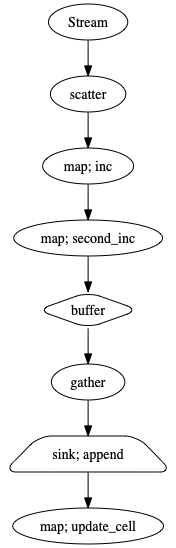

In [5]:
source.visualize()

In [6]:
import waterhealer as wh

source = wh.source.metrics(source = source)

In [7]:
for i in range(10):
    source.emit(i)

In [13]:
client.profile(key = 'second_inc')

{'description': {'filename': '', 'name': '', 'line_number': 0, 'line': ''},
 'children': {'second_inc;<ipython-input-1-a92560649a52>;8': {'description': {'filename': '<ipython-input-1-a92560649a52>',
    'name': 'second_inc',
    'line_number': 9,
    'line': ''},
   'children': {},
   'count': 0,
   'identifier': 'second_inc;<ipython-input-1-a92560649a52>;8'}},
 'count': 3004,
 'identifier': 'root'}

In [ ]:
client.profile(filename='dask-profile.html')

In [ ]:
# import requests
# from prometheus_client.parser import text_string_to_metric_families

# metrics = requests.get('http://localhost:8000/').content
# for family in text_string_to_metric_families(metrics.decode()):
#     for sample in family.samples:
#         print("Name: {0} Labels: {1} Value: {2}".format(*sample))

In [ ]:
from operator import add, mul
from dask.threaded import get
dsk = {'x': 1, 'y': (add, 'x', 10), 'z': (mul, 'y', 2)}

with Profiler() as prof:
    get(dsk, 'z')

In [ ]:
prof.results

In [15]:
import asyncio

@asyncio.coroutine
def greet_every_two_seconds():
    while True:
        print('h')
        yield from asyncio.sleep(2)
        
def loop_in_thread(loop):
    asyncio.set_event_loop(loop)
    loop.run_until_complete(greet_every_two_seconds())

In [18]:
loop = asyncio.get_event_loop()
loop

<_UnixSelectorEventLoop running=True closed=False debug=False>

In [20]:
import threading

t = threading.Thread(target=loop_in_thread, args=(loop,))
t.start()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 926, in _bootstrap_inner
    self.run()
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "<ipython-input-15-b88ad68e1111>", line 11, in loop_in_thread
    loop.run_until_complete(greet_every_two_seconds())
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 566, in run_until_complete
    self.run_forever()
  File "/usr/local/Cellar/python/3.7.5/Frameworks/Python.framework/Versions/3.7/lib/python3.7/asyncio/base_events.py", line 521, in run_forever
    raise RuntimeError('This event loop is already running')
RuntimeError: This event loop is already running



h
h
h
